<a href="https://colab.research.google.com/github/deniseiras/EscolaVeraoSantosDumont2023/blob/main/Climate_Collab_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1iGfkeEbDQKaU7tmDigS_kR2O6P-SmPKQ?usp=sharing"><p align="center">Homepage</p></a>


This work is derived from [Open Hackathons](https://www.openhackathons.org/) Github repository, and can be accessed [here](https://github.com/openhackathons-org)  

## Licensing
This material is released by OpenACC-Standard.org, in collaboration with NVIDIA Corporation, under the Creative Commons Attribution 4.0 International (CC BY 4.0).

## Instructions

Kindly change runtime type to use GPU before running any of the cells. 

```
Runtime ->  Change Runtime type -> Select GPU from the drop down box.
```


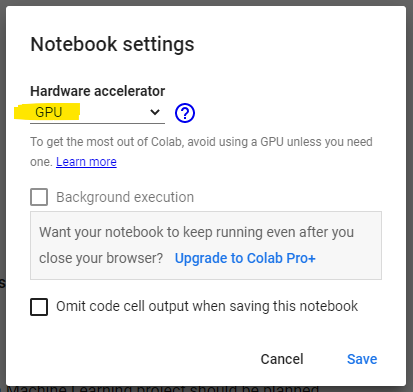


Run the below cell to install required libraries and import dataset into the Notebook.

In [ ]:
# This will setup all files required to run the collab notebook for you, this will take around 2 minutes and is a one-time process.
!wget "https://gist.githubusercontent.com/aswinkumar1999/ad51d8562b0a83b0ca6eca461e1feae5/raw/97f48a48c816b785d6ecf4d48e0de1cfd143a033/setup_collab.py" && python3 setup_collab.py

# Part 1 - Motivation 

## Tropical Cyclone Intensity Estimation using a Deep  Convolutional Neural Network 


*Tropical cyclone intensity estimation is a challenging task as it requires domain knowledge while extracting
features, significant pre-processing, various sets of parameters obtained from satellites, and human intervention for analysis.*

*The inconsistency of results, significant pre-processing of data, the complexity of the problem domain, and problems on generalizability are some of the issues related to intensity estimation. In this Jupyter Notebook, we run a deep convolutional neural network architecture for categorizing hurricanes based on intensity using graphics
processing unit.*

*This Jupyter Notebook is a recreation of the Research Paper titled **" Tropical Cyclone Intensity Estimation Using a Deep Convolutional Neural Network "** by Ritesh Pradhan, Ramazan S. Aygun, Senior Member, IEEE, Manil Maskey, Member, IEEE, Rahul Ramachandran, Senior Member, IEEE, and Daniel J. Cecil *


## Motivation for the Problem 



##### Since hurricanes (or tropical cyclones) possess substantial threats and cause significant damage to lives and properties, studying the stages of a hurricane is essential to determine its impact. From a scientific perspective, determining an accurate TC intensity helps. 


* More accurate historical records of TCs, mainly if a technique can be consistently applied to older satellite imagery (i.e., intensity reanalysis)  

* Providing consistent intensity estimates as current intensity estimates are made via a subjective algorithm (Dvorak technique) that is applied inconsistently in different forecast areas. Initial errors are too high, especially for weak and storms that are transitioning in structure.


In this example, we use the Saffir-Simpson Hurricane Wind Scale (SSHWS) along with intensity categorization for tropical storm and tropical depression as tropical cyclone (TC) intensity categories.


Since TC intensity is based on maximum wind speeds (MWS), estimating the TC intensity by just using image content is a challenging problem. Several techniques utilize satellite imagery for estimating tropical cyclone intensity using Dvorak and deviation-angle variance technique (DAVT) techniques.

![alt_text](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/cat%2Bdvat.png)

### Dvorak Technique : 

The Dvorak technique is a method using enhanced Infrared and/or visible satellite imagery to quantitatively estimate the intensity of a tropical system. Cloud patterns in satellite imagery normally show an indication of cyclogenesis before the storm reaches tropical storm intensity. Indications of continued development and/or weakening can also be found in the cloud features. Using these features, the pattern formed by the clouds of a tropical cyclone, expected systematic development, and a series of rules, an intensity analysis and forecast can be made.

The primary assumption of the Dvorak method is that cyclones with similar intensity tend to have a similar pattern.


This Figure shows some development patterns used by the Dvorak technique. Once a pattern is detected over 24 hours, the features such as length and banding from the storm are further analyzed to reach a particular
T-number. This relates tropical cloud structures to storm intensity. Nevertheless, this technique is not perfect and still suffers from subjective biases. Due to the inherent limitations of the empirical method used, it cannot determine subtropical cyclone intensity. Today, with the successful application of the Dvorak technique for more than 30 years along with some modifications and improvements, it is used worldwide for TC intensity estimation. The Advanced Dvorak Technique provides a nearly instantaneous estimate of TC intensity objectively. It removes a large amount of the subjectivity inherent in the process and produces errors similar to a human in most cases. But despite these attempts the errors can be high during the initial phase for weak storms that are transitioning in structure. 

# Part 2 - Approaching the problem & Understanding the dataset


- Approaching the Problem
- Data
- Tasks
- Model and Loss
- Training and Evaluation
- Working with the Image Dataset
- Working with the Text Dataset


**By the end of this topic participants will:**

- Understand the Dataset
- Learn Pre-processing of the Dataset

## Approaching the Problem

During this lab we will be making use of the following buckets to help us understand how a Machine Learning project should be planned and executed: 

1. **Data**: To start with any ML project we need data which is pre-processed and can be fed into the network.
2. **Task**: There are many tasks present in ML, we need to make sure we understand and define the problem statement accurately.
3. **Model**: We need to build our model, which is neither too deep or complex, thereby taking a lot of computational power or too small that it could not learn the important features.
4. **Loss**: Out of the many _loss functions_ present, we need to carefully choose a _loss function_ which is suitable for the task we are about to carry out.
5. **Learning**: As we mentioned in our last notebook, there are a variety of _optimisers_ each with their advantages and disadvantages. So here we choose an _optimiser_ which is suitable for our task and train our model using the set hyperparameters.
6. **Evaluation**: This is a crucial step in the process to determine if our model has learnt the features properly by analysing how it performs when unseen data is given to it.

## Data

##### The Image data will be annotated using the Text Data to create our dataset from which the model will learn to classify the type of cyclone.


The dataset has already been downloaded for participants, and we will be using it.

Example of images that will be fed into our model  : 

<table><tr>
<td><img src="https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/example.jpg" alt="Drawing" style="width: 320px;"/></td>
<td><img src="https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/example1.jpg" alt="Drawing" style="width: 320px;"/></td>
</tr>
</table>

*Source: https://www.nrlmry.navy.mil/*

#### Each Image will be annotated to a category of Cyclone Intensity using the text data with the help of the following table :

![alt text](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/cat.png)

## Task 

There are a variety of tasks present in DL, and the task we are about to do is called Multi-class Classification. 

Here, multiple classes are present, and the model needs to classify the image into the correct class. 

The Classes here are the intensity of the tropical cyclone which will be estimated using the wind speeds of the cyclone: 
- NC ( No Category         , $\leq 20$ knots)
- TD ( Tropical Depression , $20-33$ knots)
- TS ( Topical Storm       , $34-63$ knots)
- H1 ( Category One        , $64-82$ knots)
- H2 ( Category Two        , $83-95$ knots)
- H3 ( Category Three      , $96-112$ knots)
- H4 ( Category Four       , $113-136$ knots)
- H5 ( Category Five       , $\geq 137$ knots)

##### Example of Multi-Class Classification is : 
<img src="https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/multi_class1.png" alt="Drawing" style="width: 520px;"/></td>


## Model and Loss 

#### We will be using the model given in the research paper : 

The Hyper-parameters in this model ( kernel size, number of hidden layers ) is tailor-made for this project. 

![alt text](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/model.png)


### Loss Function :

We have seen about three different Multi-class loss function, they are :
- *Multi-Class Cross-Entropy Loss*
- Sparse Multi-class Cross-Entropy Loss
- Kullback Leibler Divergence Loss

We will be using the Multi-class Cross-Entropy loss function for this classification. And one can use any of the three loss function for this task.

##### Multi-Class Cross-Entropy loss : 

Before we understand how the loss value is calculated, let us understand how the outputs are produced.

When we train our model , we convert all the categories to a array of 1's and 0's. Let us assume we have a model to predict if a given image is a cat or a dog, we will then start labelling all the outputs in our dataset and assign `cat = [ 1 , 0 ]` and `dog = [ 0 , 1 ] ` and we will then train our model based on it, our model will then predict the probabilities of the output of what it thinks it to be, let's say we give it an image of a cat, we get the output to be `[ 0.87 , 0.13]` which implies that the model is 87% confident that it is a cat,but this is still not good enough we then calculate the error in this case with the following equation. 

$$ Loss = J(w) = - \frac{1}{N}\sum_{n=0}^{N} \left[ y_n \log{\hat{y_n}} + (1 - y_n) \log{(1-\hat{y_n})}  \right] $$

So ,if we try calculating the loss in our case from the equation , we will try calculating loss value for different values 

$ Loss = - \frac{1}{2}\left[ \log{0.87} + (1 - 0) \log{(1 - 0.13)} \right] = -1 * \log{0.87} = 0.060 $

If our model trained over time and if the output would be `[ 0.90 , 0.10 ]` , then let's calculate our loss again.

$ Loss = - \frac{1}{2}\left[ \log{0.90} + (1 - 0) \log{(1 - 0.10)} \right] = -1 * \log{0.90} = 0.045 $

So ,now we notice our loss value to have reduced , so using these equations our model learns to understand how it performs and updates the weights to perform better. 

### Optimizer : 

In this model, we will be using SGD Optimizer ( Stochastic Gradient Descent ) Optimizer.

##### Gradient Descent : 

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. 

Let us get an insight to understand how gradient descent works :

Starting at the top of the mountain, we take our first step downhill in the direction specified by the negative gradient. Next, we recalculate the negative gradient (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process iteratively until we get to the bottom of our graph, or to a point where we can no longer move downhill–a local minimum.

<td><img src="https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/grad.jpg" alt="Drawing" style="width: 420px;"/></td>

*Source: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931*

GD runs through all the samples in training set to do a single update for a parameter in a particular iteration. In SGD, on the other hand, you use only one or subset of training sample from your training set to do the update for a parameter in a particular iteration. 

Using SGD will be faster because only one training sample is used and it starts improving itself right away from the first sample.


## Training and Evaluation 

We will split our dataset into three different sets :

- Training Set
    - 72 % of the Dataset
- Test Set 
    - 18 % of the Dataset
- Validation Set 
    - 10% of the Dataset 

You are free to play around with these ratios in the next notebook.

Summary of our approach : 

![alt_text](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/now.png)


## Working with the Image Dataset 

The images are downloaded in the 'Dataset' folder

### To work with the images, we need to understand the hierarchy of the Stored Images : 

The Hierarchy of this Dataset is similar to that of U.S.Naval Database for storing images, and this has been retained for storing the images as to easily scale / add more features to this.

Let's now understand how it is arranged : 


    │Dataset                                  --> Root Folder
    │└── tcdat                                --> First Nested Folder ( tcdat = tropical cyclone database )
    │    └── tc04                             --> Second Nested Folder ( tcxx = xx stand for yeah 20xx , tc04 = 2004) 
    │        └── ATL                          --> Third Nested Folder ( ATL -> Stands for Atlantic Cyclones)
    │            ├── 01L.ALEX                 --> Fourth Nested Folder ( Name of the Cyclone)
    │                └── ir                   --> Fifth Nested Folder ( Type of Image , We will be working with IR only)
    │                    └── geo              --> Sixth Nested Folder
    │                        └── 1km          --> Seventh Nested Folder ( Range of the Image ) 
                                              --> Images will be contained Here
                                      
So, Now we need to make sure we can recurse through this :

In [ ]:
#Import Necessary Libraries 
import os

#List what is present in 'Dataset/' directory
dir ='/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/Dataset/'
a = os.listdir(dir)
try :
    a.remove('Aug') # Exclude the augmented images
except : 
    pass
#Recurse to find total number of Images 
total=[]

# First Nested Folder
for i in a:
    b = os.listdir(dir+i)
    #Second Nested Folder
    for j in b :
        c = os.listdir(dir+i+'/'+j)
        #Third Nested Folder
        for k in c :
            d = os.listdir(dir+i+'/'+j+'/'+k)
            #Fourth Nested Folder ( Cyclone Name)
            for l in d :
                # 5th , 6th and 7th are always '/ir/geo/1km' , so we add them to the string.
                e = os.listdir(dir+i+'/'+j+'/'+k+'/'+l+'/ir/geo/1km')
                print(j+'-> '+l+' --> '+ str(len(e)))
                # e contains the list of images of that cyclone
                total = total + (e)
print('')
print('Total number of images present in the Dataset :',len(total)) 

So , now let us try to understand how the images look like. 

In [ ]:
total.sort()
total[:5]

By a quick glance, we can understand the the Image Name has much information stored in it. 

Now, let us understand the format of the Data stored : 

*YYYYMMDD.HHMM*.Name of Satellite that captured the image and other relevant Data.jpg

YYYYMMDD.HHMM  -> Year Month Date. Hours Minutes 

*Now we will be using the date time provided in the image name to annotate the type of category using the text data*

## Working with the Text Data 

We will be using the Best Track Data (HURDAT2) in the Atlantic Region for the Tropical Cyclone. From its [description](http://www.nhc.noaa.gov/data/#hurdat) on the NOAA's data web page:


<p class="reg"><span style="font-weight:bold;">Atlantic hurricane database (HURDAT2) 1851-2018</span> <br>

This dataset was provided on 10 May 2019 to include the 2018 update to the best tracks.
</p>

<p class="reg">
This dataset (<a href="/data/hurdat/hurdat2-format-atlantic.pdf">known as Atlantic HURDAT2</a>) has
a comma-delimited, text format with six-hourly information on the location,
maximum winds, central pressure, and (beginning in 2004) size of all known tropical cyclones and subtropical cyclones.
The original HURDAT database has been retired.</p>



This data follows a Modified CSV format because of which Pandas ( Python Library for Data Manipulation and Analysis ) can not get any useable data directly. Hence, we will be building our parser to pre-process this data and make it usable in the upcoming tasks.


### Let us have a look at the text data :

In [ ]:
import pandas as pd

atlantic_storms= pd.read_csv('/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/atlantic.csv')
atlantic_storms.tail(10)

In [ ]:
# We'll be using the Date and Time for Finding out the Velocity of the Cyclone 
# So we'll make it into a readable format

atlantic_storms['date'] = pd.to_datetime(atlantic_storms['date'].astype(str))
atlantic_storms['date'] = atlantic_storms.apply(lambda srs: srs['date'].replace(hour=int(("%04d" % srs['hours_minutes'])[:2]), minute=int(("%04d" % srs['hours_minutes'])[2:])), axis='columns')
del atlantic_storms['hours_minutes']
atlantic_storms.tail()

In [ ]:
# Let's now save our Text Data to Use it in the Upcoming Notebooks
atlantic_storms.to_csv("/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/atlantic_storms.csv", encoding='utf-8')

### Alternate Approach : 

Above we have seen the flow in which we approach the problem, we can also solve the same problem using an alternate approach : 

![alt_text](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/alt.png)
 
But, the later approach is not advised and the reason behind the same lies in the data we are working with : 

Let us take the output of the cell containing the names of the images: 

```
['20040729.0645.goes-12.ir.x.99LINVEST.25kts-1009mb-250N-710W.jpg',
 '20040729.0702.goes-12.ir.x.99LINVEST.25kts-1009mb-250N-710W.jpg',
 '20040729.0715.goes-12.ir.x.99LINVEST.25kts-1009mb-250N-710W.jpg',
 '20040729.0732.goes-12.ir.x.99LINVEST.25kts-1009mb-250N-710W.jpg',
 '20040729.0745.goes-12.ir.x.99LINVEST.25kts-1009mb-250N-710W.jpg']
 ```

We can see the time of the images above , it is taken approximately every 15 minutes.

Let's see the time interval of our text dataset.

In [ ]:
atlantic_storms.tail()['date']

Here, we notice the text data to be sampled once every six hours because of which we will be forced to use interpolation techniques to find the velocity at any particular instant. 

Now determining the velocity at any time instance with this interpolated data is going to be deviated from the truth value, but we know that a class has a range of velocity so the probability that our interpolated class being correct is more realstic as compared to the former.



# Part 3 - Building the model & Analyzing it!

- Understand the Model Requirements
    - Exploring Resizing Options
    - Choosing a Random Patch
- Annotating Our Dataset 
- Wrapping Things Up
    - Preparing the Dataset
    - Defining our Model
    - Compiling and Training our Model
    - Visualisations

**By the end of this topic you will:**

- Understand the Model Requirements.
- Annotation of Dataset.
- Train your Model.

## Understand the Model requirements

### We have seen the model to which our image will be fed

- The model described in the paper 
![alt text](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/model.png)

We can see that the images need to be ( 232, 232, 3) in shape to be fed into our model.

So, we will do the following steps before feeding the image into our model.

- Step 1 : Resize Image from ( 1024, 1024 ,3) to ( 256 , 256 ,3 ) 
- Step 2 : Choose a random ( 232 , 232 , 3 ) patch from the ( 256 , 256 , 3 ) and feed into our model.

**Alternate Approach** : We can modify the model's input shape to be ( 256 x 256 x 3 ) and train it on the scaled images, but we take a ( 232 x 232 x 3 ) random patch so that our model does not expect the cyclone to be in the center and learn to understanding the mapping even with the cyclones in the sides of the images.

### Step 1 :
Let's now start with Step 1 and understand all the resizing methods available to do so.

In [ ]:
import cv2
#Read the Image Using cv2.imread()
img = cv2.imread('/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/image_shape.jpg',1)
#Changing the Color Spaces
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Print the Shape of the Image
img.shape

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
#Plot the image
plt.imshow(img)

## Exploring different types of resizing options 

The Images can be resized in different ways. Some methods are as follows (as stated in OpenCV documentation) : 

<h3>Scaling</h3>
<p>Scaling is just resizing of the image. OpenCV comes with a function <b>cv2.resize()</a></b> for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are <b>cv2.INTER_AREA</b> for shrinking and <b>cv2.INTER_CUBIC</b> (slow) &amp; <b>cv2.INTER_LINEAR</b> for zooming. By default, interpolation method used is <b>cv2.INTER_LINEAR</b> for all resizing purposes.

* cv2.INTER_AREA    ( Preferable for Shrinking ) 
* cv2.INTER_CUBIC   ( Preferable for Zooming but slow )
* cv2.INTER_LINEAR  ( Preferable for Zooming and the default option )


### Step 2 : Choosing a Random Patch from the Image

We will use the `np.random.randint()` function from the Numpy toolbox to generate random numbers. The parameters of this function are the upper limits and size of the Output array as mentioned in the [Numpy Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

## Wrapping things up

In [ ]:
#Import numpy to Generate Random Numbers 
import numpy as np
#Generate random number from [0,0] to [23,23] and define start and end points 
start_pt= np.random.randint(24,size=2)
end_pt = start_pt + [232,232]
# Scale Image and Take a Random patch from it
img  = cv2.resize(img,(256,256))
rand = img[start_pt[0]:end_pt[0],start_pt[1]:end_pt[1]]
plt.imshow(rand)

In [ ]:
rand.shape

The output Of the final images is obtained as (232, 232, 3)

## Annotating our dataset 

Let us start by taking an example of Katrina Hurricane from 2005 and scaling it for all the Cyclones

In [ ]:
import pandas as pd
# Read the CSV we saved earlier
df = pd.read_csv('/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/atlantic_storms.csv')
# Create a Mask to Filter our Katrina Cyclone (2005)
mask = (df['date'] > '2005-01-01') & (df['date'] <= '2006-01-01') & ( df['name'] == 'KATRINA')
# Apply the Mask to the Original Data Frame and Extract the new Dataframe
new_df = df.loc[mask]

In [ ]:
new_df

In [ ]:
#Getting the list of Images from Our Dataset for Katrina
import os
e = os.listdir('/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/Dataset/tcdat/tc05/ATL/12L.KATRINA/ir/geo/1km')
e.sort()
#Show First five images
e[:5]

#### We can observe, the images are taken once 30 minutes, but the text data is available once every 6 hours.  So we will be interpolating the text data to fit the curve

In [ ]:
#Get list of Dates and Velocity from the New Dataframe
date_list = new_df['date'].tolist()
velocity_list = new_df['maximum_sustained_wind_knots'].tolist()

In [ ]:
print(date_list[:5])
type(date_list[0])

The Dates are in STR Format which we will be converting now to datetime format to work with.

In [ ]:
from datetime import datetime
# Get and Convert to Datetime format for the First Last recorded time of Text Data.
first = (datetime.strptime(date_list[0], "%Y-%m-%d %H:%M:%S"))
last = (datetime.strptime(date_list[-1], "%Y-%m-%d %H:%M:%S"))
print(first)
type(first)

In [ ]:
#Changes the list from Convert everything to seconds from the first image to interpolate the data
for i in range(len(date_list)):
    date_list[i]=( (datetime.strptime(date_list[i], "%Y-%m-%d %H:%M:%S")) - first ).total_seconds()
    print(date_list[i])

In [ ]:
# Interpolate using the Scipy Library Funciton
from scipy import interpolate
func = interpolate.splrep(date_list,velocity_list)

In [ ]:
#Getting List of Katrina Images 
import os
e = os.listdir('/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/Dataset/tcdat/tc05/ATL/12L.KATRINA/ir/geo/1km')
# Sort images by time
e.sort()
x=[]
y=[]
for m in e :
    try :
        #Strip the Time Data from image and convert it the a datetime type.
        time_img=(datetime.strptime(m[:13], "%Y%m%d.%H%M"))
        # If the Image is taken between the available text data
        if(time_img>=first and time_img <= last):
            # Get Interpolated Value for that time and Save It 
            value = int(interpolate.splev((time_img-first).total_seconds(),func))
            x.append((time_img-first).total_seconds())
            y.append(value)
    except :
       pass   

In [ ]:
import matplotlib.pyplot as plt
# Plot All the Saved Data Points
f = plt.figure(figsize=(24,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.title.set_text('Datapoints frm csv file')
ax2.title.set_text('Interpolated from CSV file to images')
ax.plot(date_list,velocity_list,'-o')
ax2.plot(x,y)

### Now we have interpolated and found relevant velocity for all images between the recorded text timeframe. Let us now use it for training our Model.

## Wrapping Things Up :

### Preparing the Dataset

#####  All the above modules are joined together and make It into a single function to load data

In [ ]:
import sys
sys.path.append('/content/python/source_code')
# Import Utlility functions
from utils import * 
# Load dataset
filenames,labels = load_dataset()

In [ ]:
val_filenames , val_labels = make_test_set(filenames,labels,val=0.1)

## Understanding our dataset :

We can see the following lines from the Output : 

`[344, 344, 344, 344, 344, 344, 344, 344]` and `{2: 7936, 3: 5339, 1: 3803, 4: 2934, 5: 2336, 6: 2178, 7: 204, 0: 100}`

This is the distribution of our validation set and training set over it's classes. 

For the validation set we use *Stratified Validation* set so that our validation set nearly respresent the whole class. 


In [ ]:
#Make train test set
test = 0.2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filenames, labels, test_size=test, random_state=1)

## One-Hot Encoding 

`y_train` is a list containing data from 0-7 such as [ 2,4,5,....] but our Model Needs an Input of Array for Each Output as as 1D vector  :

2 --- > [ 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0] 

4 --- > [ 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0] 


This is encoded as such because keeping the other values 0 is necessary for the model to find the model Loss and use backpropagation for making it learn the _Weight Matrix_.

The below given image is an example of One-Hot Encoding :

![alt text](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/one_hot.jfif)

Reference : [What is One Hot Encoding and How to Do It](https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179)

In [ ]:
import tensorflow as tf
y_train = tf.one_hot(y_train,depth=8)
y_test = tf.one_hot(y_test,depth=8)
val_labels = tf.one_hot(val_labels,depth=8)

In [ ]:
train,test,val = make_dataset((x_train,y_train,128),(x_test,y_test,32),(val_filenames,val_labels,32))

### Defining our Model

![alt_text](https://raw.githubusercontent.com/openhackathons-org/gpubootcamp/master/hpc_ai/ai_science_climate/English/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/images/model.png)

We will be Implementing this model in Keras using the following code

In [ ]:
import numpy as np
import os

tf.random.set_seed(1337)

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten ,Dropout, MaxPooling2D
from tensorflow.keras import backend as K 

#Reset Graphs and Create Sequential model
K.clear_session()
model = Sequential()
#Convolution Layers

model.add(Conv2D(64, kernel_size=10,strides=3, activation='relu', input_shape=(232,232,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Conv2D(256, kernel_size=5,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Conv2D(288, kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(272, kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=3,strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2))
model.add(Dropout(0.5))
model.add(Flatten())

#Linear Layers 

model.add(Dense(3584,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(8, activation='softmax'))

# Print Model Summary

model.summary()

### Compiling and Training our Model

We will be using the following : 

- Optimizer : SGD ( Stochastic Gradient Descent ) with parameters mentioned in the research paper.
    - Learning Rate : 0.001
    - Momentum : 0.9
- Loss Function : Categorical Cross Entropy ( Used in Multi-class classification ) 
- Metrics : We will be using two metrics to determine how our model performs 
    - Accuracy  : Number of Predictions correct / Total number of Predictions
    - Top -2 Accuracy : Top-2 accuracy means that any of your model 2 highest probability answers must match the expected answer.


In [ ]:
import functools

# Include Top-2 Accuracy Metrics 
top2_acc = functools.partial(tensorflow.keras.metrics.top_k_categorical_accuracy, k=2)
top2_acc.__name__ = 'top2_acc'

#Define Number of Epochs
epochs = 4

#But Training our model from scratch will take a long time
#So we will load a partially trained model to speedup the process 
model.load_weights("/content/python/jupyter_notebook/Tropical_Cyclone_Intensity_Estimation/trained_16.h5")

# Optimizer
sgd = tensorflow.keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)


#Compile Model with Loss Function , Optimizer and Metrics
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, 
              optimizer=sgd,
              metrics=['accuracy',top2_acc])

# Train the Model 
trained_model = model.fit(train,
          epochs=epochs,
          verbose=1,
          validation_data=val)

# Test Model Aganist Validation Set
score = model.evaluate(test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Visualisations

Let us now visualise how our model perfromed during the training process : 

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax.plot(trained_model.history['accuracy'])
ax.plot(trained_model.history['val_accuracy'])
ax.set_title('Model Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Val'])

ax2 = f.add_subplot(122)
ax2.plot(trained_model.history['loss'])
ax2.plot(trained_model.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Val'],loc= 'upper left')

plt.show()

## Confusion Matrix :

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

Here , the rows display the predicted class and the columns are the truth value of the classes.From this we can estimate how our model performs over different classes which would in turn help us determine how our data should be fed into our model.




In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd

#Plotting a heatmap using the confusion matrix
pred = model.predict(val)
p = np.argmax(pred, axis=1)
y_valid = np.argmax(val_labels, axis=1, out=None)
results = confusion_matrix(y_valid, p) 
classes=['NC','TD','TC','H1','H3','H3','H4','H5']
df_cm = pd.DataFrame(results, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (15,15))

sn.heatmap(df_cm, annot=True, cmap="Blues")

### Congralutions on running your first model. Now In the next notebook , let us try to understand the drawbacks of this model and make it better :


We can notice that the validation accuracy is lesser than the training accuracy. This is because the model is not properly Regularized and the possible reasons are : 

**Not enough data-points / Imbalanced classes**

Using different techniques we will be regulating and normalising the model in the Part 2 notebook.

```
Homepage -> Part 2 ( under Tropical Cyclone Intensity Estimation using Deep Convolutional Neural Networks)
```


<a href="https://colab.research.google.com/drive/1iGfkeEbDQKaU7tmDigS_kR2O6P-SmPKQ?usp=sharing"><p align="center">Homepage</p></a>